<div  style="text-align:center;font-weight:bold;font-size: 100%;color: green;">

# DO THE NUMBER OF FATAL TRAFFIC ACCIDENTS EACH DAY IN PERÚ FOLLOW A POISSON DISTRIBUTION?
</div>

<img src='https://www.researchgate.net/profile/Eugenio-Roldan/publication/287039109/figure/fig3/AS:550049855832065@1508153513782/Distribucion-de-Poisson-para-dos-valores-del-numero-medio-i-i-i-i14-2-Notese.png' width=30%></img>


In this notebook I am going to replicate one of the many examples that Mr. David Spiegelhalter explain in his book "The art of statistics, How to learn from data". In this exercise let's find out if the number of fatal traffic accidents each day in Perú follow a Poisson Disribution.

<div  style="font-size: 120%;color: #000956;">

## 1: Downloading the data
</div>

We download the data from the web of the "Observatorio Nacional de Seguridad Vial" : https://www.onsv.gob.pe/datosabiertos and then we upload the data with "pandas"


In [3]:
Siniest = pd.read_excel("E:/Pilar/ESTUDIOS/GITHUB_LibroaboutStatistics/SINIESTROS_2021_2022.xlsx")

<div  style="font-size: 120%;color: #000080;">

## 2: Calculating some statistics about the data
</div>

We obtain some statistics about the data, about the categories


In [ ]:
import numpy as np
import pandas as pd
import os
import glob

In [65]:
Siniest.head(5)

,CÓDIGO SINIESTRO,FECHA SINIESTRO,HORA SINIESTRO,CLASE SINIESTRO,CANTIDAD DE FALLECIDOS,CANTIDAD DE LESIONADOS,CANTIDAD DE VEHICULOS DAÑADOS,DEPARTAMENTO,PROVINCIA,DISTRITO,...,ZONIFICACIÓN,CARACTERÍSTICAS DE VÍA,PERFIL LONGITUDINAL VÍA,SUPERFICIE DE CALZADA,¿EXISTE SEÑAL VERTICAL?,CLASIFICACIÓN DE LA SEÑAL VERTICAL Nº 1,CLASIFICACIÓN DE LA SEÑAL VERTICAL Nº 2,¿EXISTE SEÑAL HORIZONTAL?,CAUSA FACTOR PRINCIPAL,CAUSA ESPECÍFICA
0,A-2021-01-22,01/01/2021,17:45,CHOQUE,1,1,2.0,SAN MARTIN,RIOJA,RIOJA,...,COMERCIAL,INTERSECCIÓN,PLANA,CONCRETO,SI,REGULADORA (R),INFORMATIVA (I),SI,IMPRUDENCIA DEL CONDUCTOR,CONDUCIR EN SENTIDO CONTRARIO
1,A-2021-01-23,01/01/2021,04:40,DESPISTE,1,0,1.0,LIMA,HUARAL,HUARAL,...,RURAL,TRAMO RECTO,PLANA,TROCHA,NaN,NaN,NaN,NaN,NO IDENTIFICA LA CAUSA,NaN
2,A-2021-01-248,01/01/2021,05:45,DESPISTE,1,3,0.0,LIMA,LIMA,PACHACAMAC,...,INDUSTRIAL,TRAMO RECTO,PLANA,ASFALTADA,NaN,NaN,NaN,NaN,IMPRUDENCIA DEL CONDUCTOR,CONDUCIR EN ESTADO DE EBRIEDAD Y/O DROGADICCIÓN
3,A-2021-01-254,01/01/2021,14:00,ATROPELLO,1,1,0.0,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,...,INDUSTRIAL,TRAMO RECTO,PLANA,ASFALTADA,NaN,NaN,NaN,NaN,IMPRUDENCIA DEL CONDUCTOR,CONDUCIR EN ESTADO DE EBRIEDAD Y/O DROGADICCIÓN
4,A-2021-01-38,01/01/2021,06:00,ATROPELLO FUGA,2,0,0.0,LA LIBERTAD,VIRU,VIRU,...,COMERCIAL,TRAMO RECTO,PLANA,ASFALTADA,NaN,NaN,NaN,NaN,NO IDENTIFICA LA CAUSA,NaN


In [4]:
 ##We are going to list all the variables to find which are the most relevant to our analysis
Siniest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 28 columns):
CÓDIGO SINIESTRO                           4855 non-null object
FECHA SINIESTRO                            4855 non-null object
HORA SINIESTRO                             4855 non-null object
CLASE SINIESTRO                            4855 non-null object
CANTIDAD DE FALLECIDOS                     4855 non-null int64
CANTIDAD DE LESIONADOS                     4855 non-null int64
CANTIDAD DE VEHICULOS DAÑADOS              3864 non-null float64
DEPARTAMENTO                               4855 non-null object
PROVINCIA                                  4855 non-null object
DISTRITO                                   4855 non-null object
ZONA                                       4834 non-null object
TIPO DE VÍA                                4855 non-null object
RED VIAL                                   4855 non-null object
COD CARRETERA                              4855 non-null objec

In [6]:
for i in (1,3,4,7):
    print(f"VARIABLE EXAMINADA: {Siniest.columns[i]}")
    print(f"{Siniest[Siniest.columns[i]].value_counts()}")
    print("-" *50)

VARIABLE EXAMINADA: FECHA SINIESTRO
14/08/2022    18
10/07/2022    18
03/04/2022    17
22/08/2021    17
25/09/2022    17
              ..
09/07/2022     1
23/07/2021     1
28/12/2021     1
06/02/2021     1
03/08/2022     1
Name: FECHA SINIESTRO, Length: 727, dtype: int64
--------------------------------------------------
VARIABLE EXAMINADA: CLASE SINIESTRO
CHOQUE                    1648
DESPISTE                  1332
ATROPELLO                  931
ATROPELLO FUGA             465
VOLCADURA                  164
CHOQUE FUGA                136
CHOQUE CON OBJETO FIJO      72
CAÍDA DE PASAJERO           57
ESPECIAL                    47
FERROVIARIO                  2
INCENDIO                     1
Name: CLASE SINIESTRO, dtype: int64
--------------------------------------------------
VARIABLE EXAMINADA: CANTIDAD DE FALLECIDOS
1     4346
2      346
3       90
4       34
5       19
6        6
7        3
11       2
8        2
26       1
18       1
33       1
17       1
9        1
20       1
16   

These statistics are going to help us to define certain things. We can see that this database only has those accidents with at least one deceased person. We must clarify (just as is specified in the book) that even when in a accident there were many deaths, it will only count as one. So, one row, one fatal accident.

Another aspect is that when we list all days in the database, there are only 727 days. And as it is supposed that the database contains the information of two years (365*2=730), it is clear that there were 3 days with no accidents


<div  style="font-size: 120%;color: #000080;">

 ## 3: Obtaining the average of fatal traffic accidents per day

</div>


Now I am going to obtain the average of "fatal traffic accidents" per day. As every row is "fatal traffic accident", and the dataframe has the information since 1 Jan 2021 until 31 Dec 2022,so, I just have to divide the number of rows by the number of days in two years.

In [7]:
avg_sinie = len(Siniest)/(365*2)

In [8]:
print(f"The average of sinisters per day is {avg_sinie}")

The average of sinisters per day is 6.6506849315068495


<div  style="font-size: 120%;color: #000080;">

 ## 4: Calculating the number of fatal traffic accidents per day

</div>

Next, let's count the number of fatal traffic accidents per day, and insert in a dataframe "conteo_fechas"


In [9]:
conteo_fechas= Siniest[Siniest.columns[1]].value_counts().sort_index().to_frame()
conteo_fechas

,FECHA SINIESTRO
01/01/2021,7
01/01/2022,8
01/02/2021,6
01/02/2022,4
01/03/2021,5
...,...
31/08/2022,5
31/10/2021,9
31/10/2022,6
31/12/2021,9


Now we are going to find the frecuency of the number of fatal traffic accidents in two years. If we read the results above, in two years there were 11 days with just 1 fatal traffic accident. And there were 2 days with eighteen fatal traffic accidents.

In [10]:
conteo_fechas[conteo_fechas.columns[0]].value_counts().sort_index()

1      11
2      30
3      65
4      86
5      93
6     102
7      83
8      70
9      60
10     47
11     29
12     15
13     13
14     11
15      5
16      1
17      4
18      2
Name: FECHA SINIESTRO, dtype: int64

<div  style="font-size: 120%;color: #000080;">

 ## 5: Creating a dataframe with the observed values

</div>

Let's create a dataframe that contains only the frecuency of the number of fatal accidents per day in 2 years


In [15]:
datos_observados = conteo_fechas[conteo_fechas.columns[0]].value_counts().sort_index().to_frame()
datos_observados.columns = ['Observ_values']  ## Change the colum's name to "Observ_values"
datos_observados

,Observ_values
1,11
2,30
3,65
4,86
5,93
6,102
7,83
8,70
9,60
10,47


In [16]:
# Create a new row as a dictionary
nueva_fila = {'Observ_values': 3}
# Agregar la nueva fila al DataFrame con el índice 0, porque queremos que esté en orden
datos_observados.loc[0] = nueva_fila
datos_observados = datos_observados.sort_index()
datos_observados

,Observ_values
0,3
1,11
2,30
3,65
4,86
5,93
6,102
7,83
8,70
9,60


<div  style="font-size: 120%;color: #000080;">
    
 ## 6: Calculating the probability
    
</div>


As all statisticians know, and also as suggested in the book, these type of variables can be represented as observations from a Poisson Distribution, but...is this true? 
Let's find out!
First, let's act like this is true and find the probability of 10 fatal traffic accidents in a day using the Poisson distribution function

In [17]:
from scipy.stats import poisson
# Parameters of the Poisson distribution
media = avg_sinie  # Average of "fatal traffic accidents per day"
valor = 10   # value for which you want to calculate the probability
probabilidad = poisson.pmf(valor, media)  ### We calculate the probability using pmf()

print("The probability of", valor, "fatal traffic accidents in a day is:", probabilidad)

The probability of 10 fatal traffic accidents in a day is: 0.06033161371496714


In [18]:
print ("It means that over 2 years we would expect",730*probabilidad, "days with 10 fatal traffic accidents")

It means that over 2 years we would expect 44.042078011926016 days with 10 fatal traffic accidents


And, the actual number of days over a 2 years period on which there were 10 fatal traffic accidents was 47...very close to the value expected

<div  style="font-size: 120%;color: #000080;">

## 7: Graph of expected values versus observed values

</div>

And now, let's graph both distribution, the real and the expected, and evaluate if they are similar


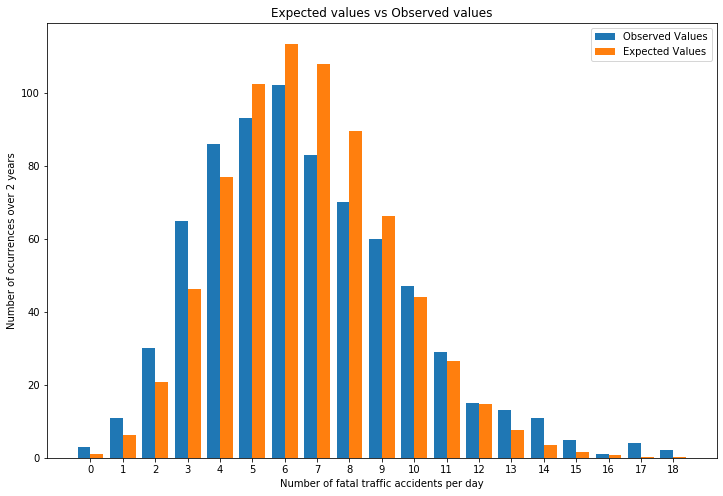

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# creating a dataframe with the expected values if our variable of interest followed a Poisson distribution
media = avg_sinie  # Media de la distribución de Poisson
valores_esperados = [poisson.pmf(x, media) * datos_observados['Observ_values'].sum() for x in range(len(datos_observados))]
# Creating a figure, axes and size
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(datos_observados))   # Definir las ubicaciones de las barras
ancho = 0.4  # Ancho de las barras
# Crear las barras de valores observados
ax.bar(x - ancho/2, datos_observados['Observ_values'], ancho, label='Observed Values')
# Crear las barras de valores esperados
ax.bar(x + ancho/2, valores_esperados, ancho, label='Expected Values')
# Etiquetas de las barras
ax.set_ylabel('Number of ocurrences over 2 years')
ax.set_xlabel('Number of fatal traffic accidents per day')
ax.set_title('Expected values vs Observed values')
ax.set_xticks(x)
ax.legend()

# Mostrar el gráfico de barras
plt.show()

In [21]:
datos_esperados = pd.DataFrame({'Expected Values': valores_esperados})
pd.merge(datos_observados, datos_esperados, left_index=True, right_index=True)

,Observ_values,Expected Values
0,3,0.943989
1,11,6.278176
2,30,20.877084
3,65,46.282303
4,86,76.952255
5,93,102.357040
6,102,113.457404
7,83,107.795635
8,70,89.614351
9,60,66.221868


With the graph and the table we can have see that for values like 10, 11, 12, the expected values are very similar than the expected. In other cases like "3" we can see a bigger difference. How can we be sure that the number of fatal traffic accidents per day has a poisson distribution with a mean of 6.65? With a Chi-square goodness of fit test

<div  style="font-size: 120%;color: #000080;">

 ## 8: Using the Chi-squared goodness-of-fit test

</div>

And now, let's create our null hypothesis:

**Hipótesis Nula (H0):** The number of fatal traffic accidents each day in Perú follow a Poisson distribution.

**Hipótesis Alternativa (H1):** The number of fatal traffic accidents each day in Perú does not a Poisson distribution.


In [22]:
import scipy.stats as stats
chi_cuadrada, valor_p = stats.chisquare(f_obs=datos_observados, f_exp=datos_esperados)
print(f"chi-square value: {chi_cuadrada}")
print(f"p value: {valor_p}")

chi-square value: [152.48884751]
p value: [2.43798145e-23]


Unlike the example in the book, we can see that the p-value is less that 0.05, so that indicates us that the null hypothesis might be an inappropriate assumption. Why is that if in some ocations like "number of days with 12 fatal traffic accidents" we obtain exactly the same value? Unfortunately for cases like 4, 5, 6, 7, and many others, the difference is bigger, and that makes that our assumption is not true. Maybe is because there are many categories (19) and I imagine it is difficult to match in all categories.

However, when I see the graph, I can see certain likeness, and I wonder if it could be correct to use the poisson distribution to try to find the probability of certains events
